<a href="https://colab.research.google.com/github/Aman-2311/ML_DataSets/blob/main/House_price_adv_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amans07
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 367MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
train = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')

In [6]:
y = train['SalePrice']
train = train.drop('SalePrice',axis=1)



In [7]:
combined = pd.concat([train,test],axis=0)
combined.reset_index(drop=True,inplace=True)

In [8]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
missing = combined.isnull().sum().sort_values(ascending = False)
missing = missing[missing>0]
missing


,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageYrBlt,159
GarageCond,159
GarageFinish,159


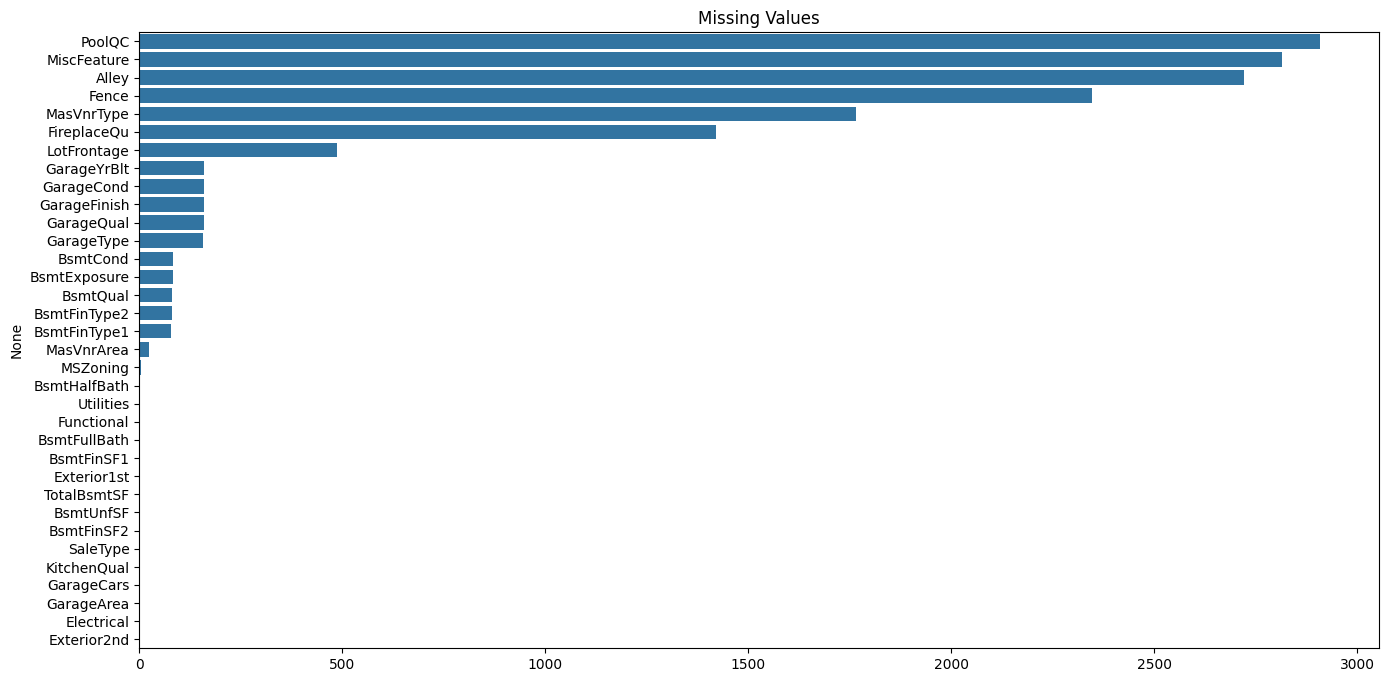

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(x=missing.values,y=missing.index)
plt.title('Missing Values')
plt.show()

special handeling gemertric reason .  lot area = srt(lot front)

In [11]:
combined['LotFrontage'] =combined['LotFrontage'].fillna(np.sqrt(combined['LotArea']))

feture enginnering

In [12]:
combined['LivingTotalSF']= (combined['TotalBsmtSF']+combined['1stFlrSF']+combined['2ndFlrSF']+combined['GarageArea']+combined['WoodDeckSF']+combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch'])

combined['TotalBath']=(combined['FullBath']+combined['HalfBath']+combined['BsmtFullBath']+combined['BsmtHalfBath'])

combined['HouseAge']= combined['YrSold']-combined['YearBuilt']

combined['YearSinceRemod']= combined['YrSold']-combined['YearRemodAdd']

combined['PercentSQtoLot']=combined['LivingTotalSF']/combined['LotArea']

combined['PercentBedrmtoRooms']=combined['BedroomAbvGr']/combined['TotRmsAbvGrd']

In [13]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,LivingTotalSF,TotalBath,HouseAge,YearSinceRemod,PercentSQtoLot,PercentBedrmtoRooms
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,3175.0,4.0,5,5,0.375740,0.375000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,3282.0,3.0,31,31,0.341875,0.500000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,3356.0,4.0,7,6,0.298311,0.500000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,3422.0,2.0,91,36,0.358325,0.428571
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,4455.0,4.0,8,8,0.312412,0.444444


In [14]:
combined['LivingTotalSF']= (combined['TotalBsmtSF']+combined['1stFlrSF']+combined['2ndFlrSF']+combined['GarageArea']+combined['WoodDeckSF']+combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch'])

combined['TotalBath']=(combined['FullBath']+combined['HalfBath']+combined['BsmtFullBath']+combined['BsmtHalfBath'])

combined['HouseAge']= combined['YrSold']-combined['YearBuilt']

combined['YearSinceRemod']= combined['YrSold']-combined['YearRemodAdd']

combined["PercentSQtoLot"] = (
    combined["LivingTotalSF"] / combined["LotArea"].replace(0, np.nan)
)


combined['PercentBedrmtoRooms']=combined['BedroomAbvGr']/combined['TotRmsAbvGrd']

# Display the first few rows to show the new columns
display(combined[['LivingTotalSF', 'TotalBath', 'HouseAge', 'YearSinceRemod', 'PercentSQtoLot', 'PercentBedrmtoRooms']].head())

,LivingTotalSF,TotalBath,HouseAge,YearSinceRemod,PercentSQtoLot,PercentBedrmtoRooms
0,3175.0,4.0,5,5,0.375740,0.375000
1,3282.0,3.0,31,31,0.341875,0.500000
2,3356.0,4.0,7,6,0.298311,0.500000
3,3422.0,2.0,91,36,0.358325,0.428571
4,4455.0,4.0,8,8,0.312412,0.444444


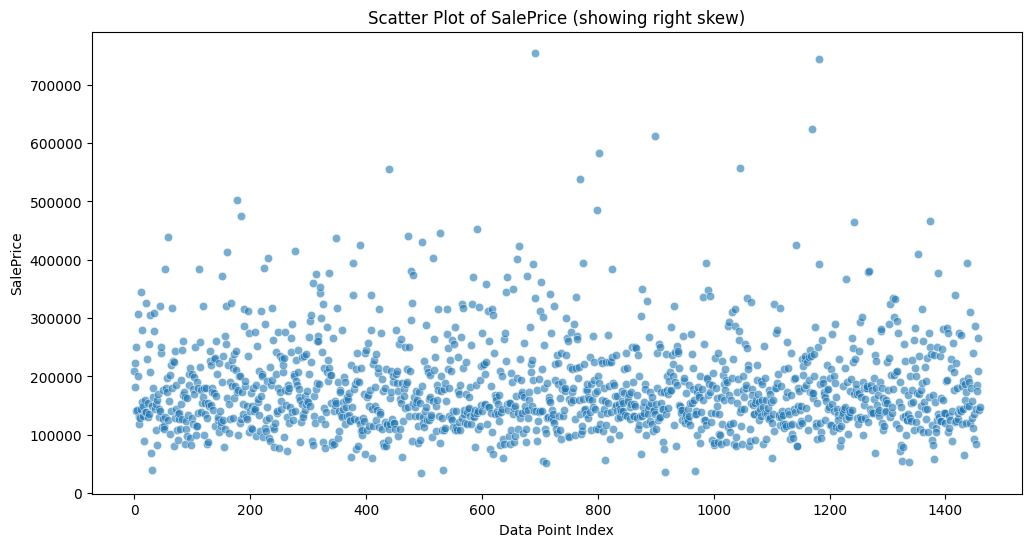

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y.index, y=y, alpha=0.6)
plt.title('Scatter Plot of SalePrice (showing right skew)')
plt.xlabel('Data Point Index')
plt.ylabel('SalePrice')
plt.show()

In [16]:
y_transformed = np.log1p(y)

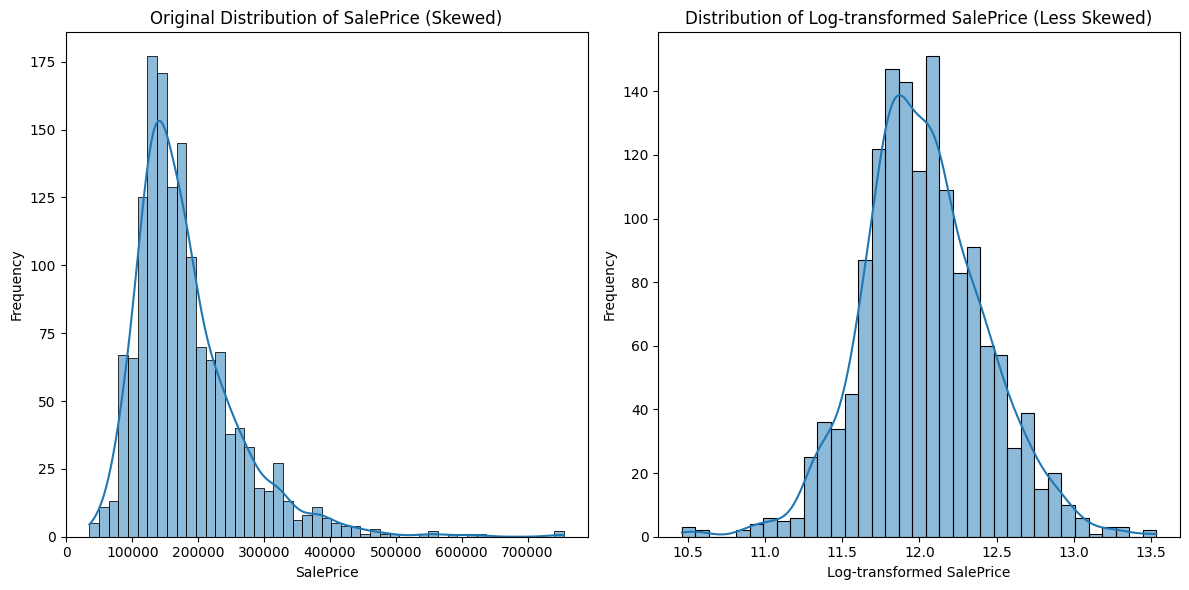

In [17]:
fig,axes= plt.subplots(1,2,figsize=(12,6))
sns.histplot(y,kde=True ,ax=axes[0])
axes[0].set_title('Original Distribution of SalePrice (Skewed)')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')

sns.histplot(y_transformed,kde=True,ax=axes[1])
axes[1].set_title('Distribution of Log-transformed SalePrice (Less Skewed)')
axes[1].set_xlabel('Log-transformed SalePrice')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

seperate categorical and numerical columns

In [18]:
numerical_fetures = combined.select_dtypes(include=['int64','float64']).columns
categorical_fetures = combined.select_dtypes(include=['object']).columns

Pre-processing Pipelines

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [20]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical',numerical_pipeline,numerical_fetures),
    ('categorical',categorical_pipeline,categorical_fetures)

])

In [21]:
from sklearn.model_selection import train_test_split

X_train = combined.iloc[:len(y)]
X_test = combined.iloc[len(y):]

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_transformed, test_size=0.2, random_state=42)

In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [27]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [28]:
models = {
    'ElasticNet':ElasticNet(alpha=0.1,l1_ratio=0.5),
    'Lasso':Lasso(alpha=0.0005),
    'Ridge':Ridge(alpha=20),
    'RandomForest':RandomForestRegressor(n_estimators=300,max_depth=15,random_state=42),
    'XGBoost':XGBRegressor(n_estimators=1000,learning_rate=0.03,max_depth=5,subsample=0.7,
                           col_sample_bytree=0.7,random_state=42),
    'CatBoost':CatBoostRegressor(iterations=1000,learning_rate=0.03,depth=6,verbose=0,random_state=42)
}


In [29]:
from sklearn.metrics import mean_squared_error

results =[]

for name, model in models.items():
  pipe=Pipeline([
      ('preprocess',preprocessor),
      ('model',model)
  ])

  pipe.fit(X_tr,y_tr)
  preds= pipe.predict(X_val)
  rmse=np.sqrt(mean_squared_error(y_val,preds))

  results.append((name,rmse,pipe))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17834122507227512, tolerance: 0.017805276464694066
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:13:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "col_sample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
result_df = pd.DataFrame(results,columns=['Model','RMSE','Pipeline'])
result_df = result_df.sort_values('RMSE')

/tmp/ipython-input-3538170054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE',y='Model',data=result_df,palette='rainbow')


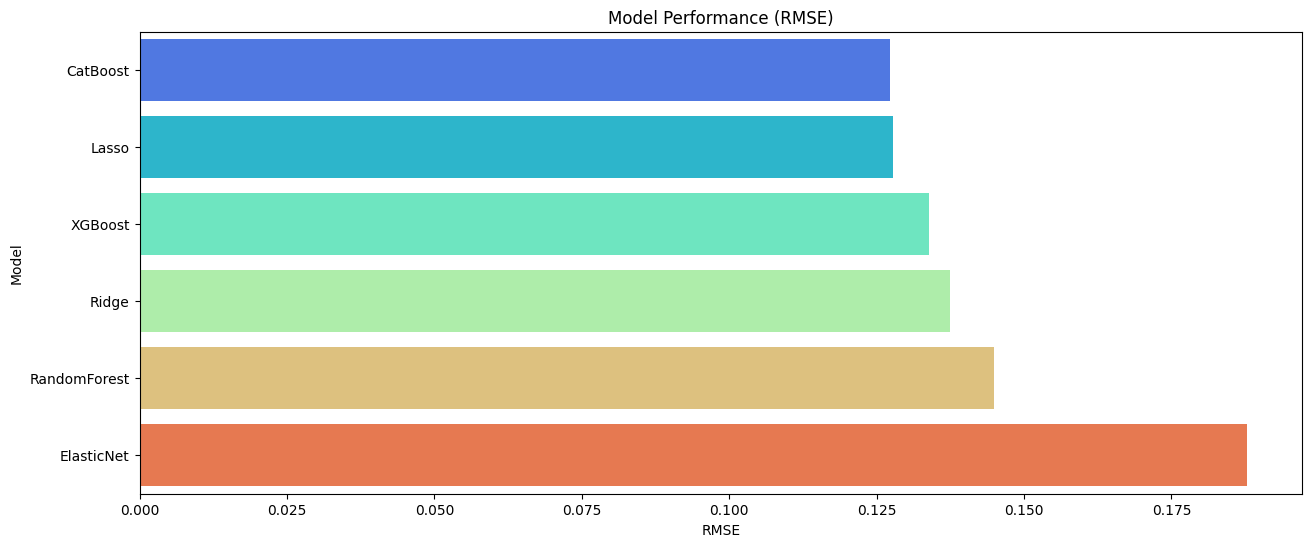

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x='RMSE',y='Model',data=result_df,palette='rainbow')
plt.title('Model Performance (RMSE)')
plt.show()

In [32]:
best_model_name = result_df.iloc[0]['Model']
best_pipeline = result_df.iloc[0]['Pipeline']

print(f'Best Model: {best_model_name}')

Best Model: CatBoost


In [33]:
best_pipeline.fit(X_train, y_transformed)

import pickle

with open("house_price_best_model.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

# Generate predictions
test_preds = best_pipeline.predict(X_test)

# Inverse transform from log space
test_preds = np.expm1(test_preds)

# Basic safety checks only
test_preds = np.clip(test_preds, 0, 1e7)  # Just prevent negatives and extreme outliers

# Create submission
submission = pd.DataFrame({
    "Id": test["Id"].astype(int),
    "SalePrice": test_preds
})

print(submission['SalePrice'].describe())
submission.to_csv("submission.csv", index=False)

count      1459.000000
mean     176438.780671
std       74276.545728
min       43366.169059
25%      127660.612463
50%      155551.547169
75%      208706.821688
max      502975.462703
Name: SalePrice, dtype: float64


In [35]:
#from google.colab import files
f#iles.download("submission.csv")


<_io.BufferedWriter name='house_price_best_model.pkl'>

In [34]:
#submission.to_csv("submission.csv", index=False)
#print("\n✅ Submission saved successfully!")